# Classification Models and Hyperparameter Finetuning 

In [1]:
import matplotlib.pyplot as plt
#%matplotlib ipympl
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics 
from sklearn.datasets import make_classification
#from xgboost import XGBClassifier
#!pip install xgboost scikit-learn pandas numpy
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

C:\Users\ophir\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def classificationMetrics(y, yhat):
    prf1 = metrics.precision_recall_fscore_support(y,yhat)
    res = {'Accuracy': metrics.accuracy_score(y,yhat),
           'Precision':prf1[0][1],
           'Recall': prf1[1][1],
           'f1-score': prf1[2][1],
           'Log-loss': metrics.log_loss(y,yhat),
           'AUC': metrics.roc_auc_score(y,yhat)
          }
    return res


## Data

In [3]:
#importing imbalanced data
df_ros = pd.read_csv('df_ros.csv')
df_ros.head()

,Unnamed: 0,host_response_time,host_neighbourhood,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,property_type,room_type,beds,...,reviews_per_month,years_of_hosting,qnum_since_last_review,qnum_since_first_review,hair_dryer,shampoo,hot_water,dishes_and_silverware,luggage_dropoff_allowed,host_is_superhost
0,0,0.0,49.0,1,32.0,4.0,52.374031,1.0,0.0,1,...,0.37,7,6,14,1,1,1,0,1,0
1,1,3.0,0.0,1,1.0,5.0,52.376054,1.0,1.0,2,...,3.53,3,4,5,1,1,1,0,1,0
2,2,4.0,16.0,19,15.0,21.0,52.357052,1.0,0.0,2,...,1.11,9,6,7,0,0,1,0,0,0
3,3,1.0,43.0,1,52.0,13.0,52.410611,13.0,0.0,3,...,0.23,7,6,13,0,1,0,0,0,0
4,4,4.0,31.0,1,37.0,20.0,52.384146,1.0,0.0,2,...,0.92,8,5,8,0,1,0,0,0,0


In [4]:
#stubborn upload bug is here to stay 
del df_ros['Unnamed: 0']
#del df_ros['split']

In [5]:
df_ros.shape

(18226, 35)

In [6]:
dev = pd.read_csv("Amsterdam_dev.csv")
#test = pd.read_csv("Amsterdam_test.csv")

In [7]:
dev.shape

(4006, 37)

In [8]:
#stubborn upload bug is here to stay 
del dev['Unnamed: 0']
del dev['split']

Visual of the imblanced data created on stage 5 with RandomOverSample techniqe 

[Text(0.5, 1.0, 'Data after Over Sampling')]

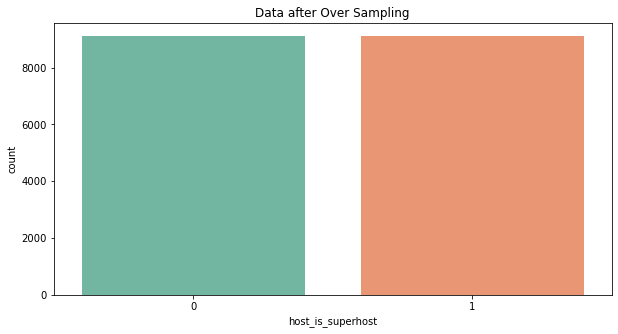

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x=df_ros['host_is_superhost'].dropna(),data=df_ros, palette="Set2").set(title='Data after Over Sampling')

In [10]:
df_ros['host_is_superhost'].value_counts()

0    9113
1    9113
Name: host_is_superhost, dtype: int64

In [11]:
X_train = df_ros.loc[:,df_ros.columns != 'host_is_superhost']
X_dev = dev.loc[:,dev.columns != 'host_is_superhost']
y_train = df_ros['host_is_superhost']
y_dev = dev['host_is_superhost']

## Supervised Models

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
models_list = pd.DataFrame()

### Linear Regression

In [14]:
mod1 = LogisticRegression(random_state=1, max_iter=1000)
mod1.fit(X_train,y_train)
pred1 = mod1.predict(X_dev)

model_dict = {'model': "Logistic Regression"}
models_list = models_list.append({**model_dict, **classificationMetrics(y_dev, pred1)}, ignore_index=True)


In [15]:
pd.crosstab(y_dev, pred1)

col_0,0,1
host_is_superhost,,
0,2616,734
1,167,489


### Decision Tree

In [16]:
mod2 = DecisionTreeClassifier(random_state=1)
mod2.fit(X_train,y_train)
pred2= mod2.predict(X_dev)

model_dict = {'model': "Decision Tree"}
models_list = models_list.append({**model_dict, **classificationMetrics(y_dev, pred2)}, ignore_index=True)


In [17]:
pd.crosstab(y_dev, pred2)

col_0,0,1
host_is_superhost,,
0,3098,252
1,387,269


### Random Forest

In [18]:
mod3 = RandomForestClassifier(random_state=1)
mod3.fit(X_train,y_train)
pred3 = mod3.predict(X_dev)
model_dict = {'model': "RandomForest"}
models_list = models_list.append({**model_dict, **classificationMetrics(y_dev, pred3)}, ignore_index=True)


In [19]:
pd.crosstab(y_dev, pred3)

col_0,0,1
host_is_superhost,,
0,3259,91
1,379,277


### Adaptive Boosting (ADABoost)

In [20]:
mod4 = AdaBoostClassifier(random_state=1)
mod4.fit(X_train,y_train)
pred4 = mod4.predict(X_dev)
model_dict = {'model': "ADABoost"}
models_list = models_list.append({**model_dict, **classificationMetrics(y_dev, pred4)}, ignore_index=True)


In [21]:
pd.crosstab(y_dev, pred4)

col_0,0,1
host_is_superhost,,
0,2837,513
1,123,533


### Gradient Boosting Machine (GBM)

In [22]:
mod5 = GradientBoostingClassifier(random_state=1)
mod5.fit(X_train,y_train)
pred5 = mod5.predict(X_dev)
model_dict = {'model': "GBM"}
models_list = models_list.append({**model_dict, **classificationMetrics(y_dev, pred5)}, ignore_index=True)


In [23]:
pd.crosstab(y_dev, pred5)

col_0,0,1
host_is_superhost,,
0,2881,469
1,100,556


### Support Vector Machine (SVM)

In [24]:
mod6 = SVC(probability=True)
mod6.fit(X_train,y_train)
pred6 = mod6.predict(X_dev)
model_dict = {'model': "SVM"}


In [25]:
pd.crosstab(y_dev, pred6)

col_0,0,1
host_is_superhost,,
0,2875,475
1,305,351


### XGBoost parallel tree boosting (GBDT, GBM) 

In [26]:
from xgboost import XGBClassifier
mod7 = XGBClassifier(random_state=1)
mod7.fit(X_train,y_train)
pred7 = mod7.predict(X_dev)
model_dict = {'model': "XGB"}
models_list = models_list.append({**model_dict, **classificationMetrics(y_dev, pred7)}, ignore_index=True)


[19:26:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [27]:
pd.crosstab(y_dev, pred7)

col_0,0,1
host_is_superhost,,
0,3083,267
1,203,453


## Model Selection

In [28]:
models_list.sort_values('AUC',ascending=False)

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
4,GBM,0.857963,0.542439,0.847561,0.661511,4.905876,0.853780
3,ADABoost,0.841238,0.509560,0.812500,0.626322,5.483543,0.829683
5,XGB,0.882676,0.629167,0.690549,0.658430,4.052281,0.805424
0,Logistic Regression,0.775087,0.399836,0.745427,0.520490,7.768354,0.763161
2,RandomForest,0.882676,0.752717,0.422256,0.541016,4.052246,0.697546
1,Decision Tree,0.840489,0.516315,0.410061,0.457094,5.509356,0.667419


# GBM provides the best results with 85.7% accuracy

### Hyperparameter Finetuning for Gradient Boosting Model (GBM)


In [29]:
#importing the boosting algorithm 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import classification_report

In [30]:
test = pd.read_csv('Amsterdam_test.csv')
test.head()

,Unnamed: 0,host_response_time,host_neighbourhood,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,property_type,room_type,beds,...,years_of_hosting,qnum_since_last_review,qnum_since_first_review,hair_dryer,shampoo,hot_water,dishes_and_silverware,luggage_dropoff_allowed,host_is_superhost,split
0,19727,1.0,31.0,1,37.0,7.0,52.369465,1.0,0.0,2,...,8,4,12,1,1,1,0,1,0,test
1,3644,1.0,45.0,2,54.0,19.0,52.353754,18.0,0.0,5,...,4,6,15,1,1,1,0,1,0,test
2,14036,1.0,8.0,1,11.0,8.0,52.353056,13.0,0.0,1,...,3,7,12,0,0,1,0,0,0,test
3,9262,4.0,49.0,1,33.0,17.0,52.357328,1.0,0.0,3,...,7,5,13,1,1,1,1,1,0,test
4,12343,1.0,9.0,2,12.0,5.0,52.372714,1.0,0.0,3,...,5,6,14,0,1,0,0,0,0,test


In [31]:
del test['Unnamed: 0']
del test['split']

In [32]:
X_test = test.loc[:,test.columns != 'host_is_superhost']
y_test = test['host_is_superhost']

## Random Search

In [33]:
#Calling Gradient boosting classifier
GB = GradientBoostingClassifier()
GB.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Creating Parameters

In [34]:
#Creating array for the next to come n_estimator
np.linspace(10, 110, num = 11)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.])

In [35]:
# Number of trees in GBM
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth=10
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [500]
# Minimum number of samples required at each leaf node
min_samples_leaf = [50]
# This is a commonly used used start value
subsample = [0.8]
#Checking recomendations for GBM and imbalanced data
#resource https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [36]:
# Creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample':subsample,
              }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [500], 'min_samples_leaf': [50], 'subsample': [0.8]}


In [37]:
gb_random = RandomizedSearchCV(estimator = GB, param_distributions = random_grid, verbose=2, random_state=42, cv=5)

In [38]:
# Fit the random search model
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=auto, min_samples_leaf=50, min_samples_split=500, n_estimators=500, subsample=0.8; total time=  44.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=50, min_samples_split=500, n_estimators=500, subsample=0.8; total time=  43.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=50, min_samples_split=500, n_estimators=500, subsample=0.8; total time=  43.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=50, min_samples_split=500, n_estimators=500, subsample=0.8; total time=  44.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=50, min_samples_split=500, n_estimators=500, subsample=0.8; total time=  43.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=500, n_estimators=700, subsample=0.8; total time=  47.8s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=50, min_samples_split=500, n_estimators=700, subsamp

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [50],
                                        'min_samples_split': [500],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'subsample': [0.8]},
                   random_state=42, verbose=2)

In [39]:
 gb_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1000,
 'min_samples_split': 500,
 'min_samples_leaf': 50,
 'max_features': 'auto',
 'max_depth': 60}

In [40]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mae = 100 * np.mean(errors)
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(np.mean(errors)))
    return mae

### Runing base model

In [41]:
base_model = GradientBoostingClassifier(n_estimators = 1000, random_state = 4)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Mean Absolute Error: 0.1198


### Compare fine-tunned model

Choosing the best model of the cv we run with test:

In [42]:
best_random = gb_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Mean Absolute Error: 0.1048


We got a better result - smaller error, thus we have an improvment on the finetuning model:

In [43]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - random_accuracy) / base_accuracy))

Improvement of 12.50%.


Running the model with Dev:

In [52]:
base_accuracy_dev = evaluate(base_model, X_dev, y_dev)

Model Performance
Mean Absolute Error: 0.1221


In [50]:
#best_random = gb_random.best_estimator_
random_accuracy_dev = evaluate(best_random, X_dev, y_dev)

Model Performance
Mean Absolute Error: 0.1071


In [51]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy_dev - random_accuracy_dev) / base_accuracy_dev))

Improvement of 12.27%.


The Improvment is very close for  Dev and Test 

### Grid Searh Cross -Validation

We will use the best parametrs from pervoius random search and will stay in the neighborhood with the grid search parameters

In [48]:
#{'subsample': 0.8, p- not callable by gridsearch
# 'n_estimators': 1000,
#'min_samples_split': 500,
# 'min_samples_leaf': 50,
# 'max_features': 'auto',
# 'max_depth': 60}

In [53]:
#Creating Grid 
param_grid = {'max_depth': [55, 60],
              'max_features': ['auto'],
              'min_samples_leaf': [45, 50],
              'min_samples_split': [500],
              'n_estimators': [1000]
              }

#GB = GradientBoostingClassifier()

In [54]:
grid_search = GridSearchCV(estimator = GB, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [55]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [55, 60], 'max_features': ['auto'],
                         'min_samples_leaf': [45, 50],
                         'min_samples_split': [500], 'n_estimators': [1000]},
             verbose=2)

In [56]:
grid_search.best_params_

{'max_depth': 55,
 'max_features': 'auto',
 'min_samples_leaf': 45,
 'min_samples_split': 500,
 'n_estimators': 1000}

Running the model with test

In [57]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Mean Absolute Error: 0.1106


In [58]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - grid_accuracy) / base_accuracy))

Improvement of 7.71%.


Running the model with dev

In [59]:
best_grid = grid_search.best_estimator_
grid_accuracy_dev = evaluate(best_grid, X_dev, y_dev)

Model Performance
Mean Absolute Error: 0.1088


In [60]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_accuracy - grid_accuracy_dev) / base_accuracy))

Improvement of 9.17%.


gb_random.best_estimator_ provides the best improvment and similar results between Train, Dev and Test

### gb_random.best_estimator_ model is now saved ang moving forward to production 

# END